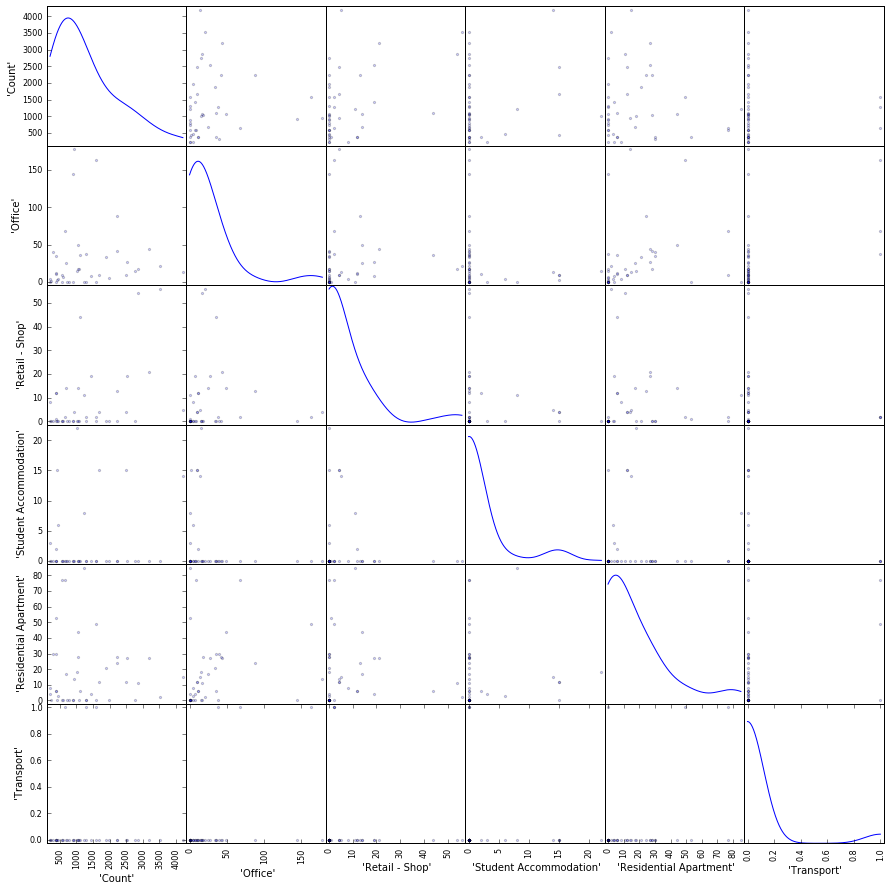

In [14]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

training = pd.read_csv('training_data.csv',
                       engine='c')

scatter_matrix(training, alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()